In [29]:
import pandas as pd


file_paths = ['mediapipe_motion_dataset_with_windows_scores.csv', 
              'movenet_motion_dataset_with_window_scores.csv',
              'yolo_motion_dataset_with_window_scores.csv']


dfs = [pd.read_csv(path) for path in file_paths]

common_columns = set(dfs[0].columns)  

for df in dfs[1:]:
    common_columns &= set(df.columns)  

print("common columns of all files:")
print(common_columns)


common columns of all files:
{'left_elbow_score', 'overall_movement_score', 'dominant_elbow', 'left_knee_score', 'dominant_knee', 'right_knee_score', 'video_id', 'frame', 'right_elbow_score'}


In [30]:

keypoint_map = {
    "left_shoulder": [("keypoint_5", "movenet"), ("keypoint_11", "mediapipe")],
    "right_shoulder": [("keypoint_6", "movenet"), ("keypoint_12", "mediapipe")],
    "left_elbow": [("keypoint_7", "movenet"), ("keypoint_13", "mediapipe")],
    "right_elbow": [("keypoint_8", "movenet"), ("keypoint_14", "mediapipe")],
    "left_hip": [("keypoint_11", "movenet"), ("keypoint_23", "mediapipe")],
    "right_hip": [("keypoint_12", "movenet"), ("keypoint_24", "mediapipe")],
    "left_knee": [("keypoint_13", "movenet"), ("keypoint_25", "mediapipe")],
    "right_knee": [("keypoint_14", "movenet"), ("keypoint_26", "mediapipe")]
}


In [31]:
def standardize_column_names(df, model_name):
    rename_dict = {}

    for joint_name, keypoints in keypoint_map.items():
        for keypoint_id, model in keypoints:
            if model == model_name:
                for suffix in ["x", "y", "confidence", "velocity_x", "velocity_y", "acceleration_x", "acceleration_y"]:
                    old_col = f"{keypoint_id}_{suffix}"
                    new_col = f"{joint_name}_{suffix}"
                    if old_col in df.columns:
                        rename_dict[old_col] = new_col

    angle_columns = {
        "left_elbow_angle": "angle_left_elbow",
        "right_elbow_angle": "angle_right_elbow",
        "left_knee_angle": "angle_left_knee",
        "right_knee_angle": "angle_right_knee"
    }
    for old_col, new_col in angle_columns.items():
        if old_col in df.columns:
            rename_dict[old_col] = new_col

    if "window_id" not in df.columns:
        if "window_index" in df.columns:
            rename_dict["window_index"] = "window_id"
        elif "chunk_index" in df.columns:
            rename_dict["chunk_index"] = "window_id"

    return df.rename(columns=rename_dict)




In [32]:
df_yolo = pd.read_csv("yolo_motion_dataset_with_window_scores.csv")

df_movenet = pd.read_csv("movenet_motion_dataset_with_window_scores.csv")
df_movenet = standardize_column_names(df_movenet, "movenet")


df_mediapipe = pd.read_csv("mediapipe_motion_dataset_with_windows_scores.csv")
df_mediapipe = standardize_column_names(df_mediapipe, "mediapipe")


In [33]:
dfs = [df_yolo, df_movenet, df_mediapipe]

common_columns = set(dfs[0].columns)
for df in dfs[1:]:
    common_columns &= set(df.columns)

print("Common columns of all files:")
print(sorted(common_columns))

num_common_columns = len(common_columns)
total_columns = len(set(dfs[0].columns))

non_common_columns = {}
for i, df in enumerate(dfs):
    unique_columns = set(df.columns) - common_columns
    non_common_columns[f"File {i+1}"] = sorted(unique_columns)

print(f"\nNumber of common columns: {num_common_columns}/{total_columns} from the first file")

for file_key, unique_cols in non_common_columns.items():
    print(f"\nNon-common columns in {file_key}:")
    print(unique_cols)



Common columns of all files:
['angle_left_elbow', 'angle_left_knee', 'angle_right_elbow', 'angle_right_knee', 'dominant_elbow', 'dominant_knee', 'frame', 'left_elbow_score', 'left_elbow_velocity_x', 'left_elbow_velocity_y', 'left_elbow_x', 'left_elbow_y', 'left_hip_velocity_x', 'left_hip_velocity_y', 'left_hip_x', 'left_hip_y', 'left_knee_score', 'left_knee_velocity_x', 'left_knee_velocity_y', 'left_knee_x', 'left_knee_y', 'left_shoulder_velocity_x', 'left_shoulder_velocity_y', 'left_shoulder_x', 'left_shoulder_y', 'overall_movement_score', 'right_elbow_score', 'right_elbow_velocity_x', 'right_elbow_velocity_y', 'right_elbow_x', 'right_elbow_y', 'right_hip_velocity_x', 'right_hip_velocity_y', 'right_hip_x', 'right_hip_y', 'right_knee_score', 'right_knee_velocity_x', 'right_knee_velocity_y', 'right_knee_x', 'right_knee_y', 'right_shoulder_velocity_x', 'right_shoulder_velocity_y', 'right_shoulder_x', 'right_shoulder_y', 'video_id', 'window_id']

Number of common columns: 46/58 from the f

In [34]:

import pandas as pd

column_map = {
    'left_shoulder_conf': 'left_shoulder_confidence',
    'right_shoulder_conf': 'right_shoulder_confidence',
    'left_elbow_conf': 'left_elbow_confidence',
    'right_elbow_conf': 'right_elbow_confidence',
    'left_knee_conf': 'left_knee_confidence',
    'right_knee_conf': 'right_knee_confidence',
    'left_hip_conf': 'left_hip_confidence',
    'right_hip_conf': 'right_hip_confidence',
}


dfs_standardized = []
for df in dfs:
    df = df.rename(columns=column_map)
    dfs_standardized.append(df)

common_columns_after = set(dfs_standardized[0].columns)
for df in dfs_standardized[1:]:
    common_columns_after &= set(df.columns)

print("Common columns after standardization:")
print(sorted(common_columns_after))



Common columns after standardization:
['angle_left_elbow', 'angle_left_knee', 'angle_right_elbow', 'angle_right_knee', 'dominant_elbow', 'dominant_knee', 'frame', 'left_elbow_confidence', 'left_elbow_score', 'left_elbow_velocity_x', 'left_elbow_velocity_y', 'left_elbow_x', 'left_elbow_y', 'left_hip_confidence', 'left_hip_velocity_x', 'left_hip_velocity_y', 'left_hip_x', 'left_hip_y', 'left_knee_confidence', 'left_knee_score', 'left_knee_velocity_x', 'left_knee_velocity_y', 'left_knee_x', 'left_knee_y', 'left_shoulder_confidence', 'left_shoulder_velocity_x', 'left_shoulder_velocity_y', 'left_shoulder_x', 'left_shoulder_y', 'overall_movement_score', 'right_elbow_confidence', 'right_elbow_score', 'right_elbow_velocity_x', 'right_elbow_velocity_y', 'right_elbow_x', 'right_elbow_y', 'right_hip_confidence', 'right_hip_velocity_x', 'right_hip_velocity_y', 'right_hip_x', 'right_hip_y', 'right_knee_confidence', 'right_knee_score', 'right_knee_velocity_x', 'right_knee_velocity_y', 'right_knee_x'

In [35]:

for i, df in enumerate(dfs_standardized):
    print(f"\nDataFrame {i}")
    print("Columns:", df.columns.tolist())
    print("Contains 'window_id'? ", 'window_id' in df.columns)
    print("Contains 'video_id'? ", 'video_id' in df.columns)
    print("window_id unique values:", df['window_id'].unique())
    print("video_id unique values:", df['video_id'].unique())




DataFrame 0
Columns: ['video_id', 'frame', 'window_id', 'angle_left_elbow', 'angle_right_elbow', 'angle_left_knee', 'angle_right_knee', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_confidence', 'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_confidence', 'left_elbow_x', 'left_elbow_y', 'left_elbow_confidence', 'right_elbow_x', 'right_elbow_y', 'right_elbow_confidence', 'left_hip_x', 'left_hip_y', 'left_hip_confidence', 'right_hip_x', 'right_hip_y', 'right_hip_confidence', 'left_knee_x', 'left_knee_y', 'left_knee_confidence', 'right_knee_x', 'right_knee_y', 'right_knee_confidence', 'overall_movement_score', 'left_knee_score', 'right_knee_score', 'dominant_knee', 'left_elbow_score', 'right_elbow_score', 'dominant_elbow', 'left_shoulder_score', 'right_shoulder_score', 'left_hip_score', 'right_hip_score', 'left_shoulder_velocity_x', 'left_shoulder_velocity_y', 'right_shoulder_velocity_x', 'right_shoulder_velocity_y', 'left_elbow_velocity_x', 'left_elbow_velocity_y', 'right

In [36]:

required_columns = {"window_id", "video_id"}
common_columns_after = set(dfs_standardized[0].columns)
for df in dfs_standardized[1:]:
    common_columns_after &= set(df.columns)

# נוודא שהעמודות הדרושות בפנים
common_columns_after |= required_columns  # מוסיף בכוח אם חסרות

# כעת ממשיכים כרגיל:
dfs_filtered = []
for df in dfs_standardized:
    df_filtered = df[list(common_columns_after)]
    dfs_filtered.append(df_filtered)

output_file_paths = ['df_yolo_filtered.csv', 'df_movenet_filtered.csv', 'df_mediapipe_filtered.csv']
for df_filtered, output_path in zip(dfs_filtered, output_file_paths):
    print(f"Saving to {output_path}, columns: {df_filtered.columns.tolist()}")
    df_filtered.to_csv(output_path, index=False)
required_columns = {"window_id", "video_id"}
common_columns_after = set(dfs_standardized[0].columns)
for df in dfs_standardized[1:]:
    common_columns_after &= set(df.columns)

# נוודא שהעמודות הדרושות בפנים
common_columns_after |= required_columns  # מוסיף בכוח אם חסרות

# כעת ממשיכים כרגיל:
dfs_filtered = []
for df in dfs_standardized:
    df_filtered = df[list(common_columns_after)]
    dfs_filtered.append(df_filtered)

output_file_paths = ['df_yolo_filtered.csv', 'df_movenet_filtered.csv', 'df_mediapipe_filtered.csv']
for df_filtered, output_path in zip(dfs_filtered, output_file_paths):
    print(f"Saving to {output_path}, columns: {df_filtered.columns.tolist()}")
    df_filtered.to_csv(output_path, index=False)


Saving to df_yolo_filtered.csv, columns: ['right_elbow_velocity_x', 'right_shoulder_x', 'right_elbow_y', 'left_elbow_x', 'left_shoulder_x', 'left_elbow_velocity_x', 'right_hip_y', 'left_elbow_score', 'left_knee_y', 'overall_movement_score', 'right_knee_velocity_x', 'dominant_elbow', 'left_shoulder_confidence', 'right_elbow_velocity_y', 'left_hip_y', 'right_knee_y', 'right_shoulder_y', 'right_knee_velocity_y', 'left_elbow_y', 'video_id', 'left_shoulder_y', 'left_elbow_velocity_y', 'left_knee_velocity_x', 'right_elbow_confidence', 'left_knee_confidence', 'right_shoulder_confidence', 'angle_right_elbow', 'left_hip_velocity_x', 'right_elbow_x', 'right_shoulder_velocity_x', 'right_hip_velocity_y', 'left_shoulder_velocity_y', 'left_hip_x', 'right_hip_velocity_x', 'angle_left_elbow', 'window_id', 'right_hip_confidence', 'left_shoulder_velocity_x', 'right_elbow_score', 'left_knee_velocity_y', 'right_hip_x', 'angle_left_knee', 'right_knee_x', 'right_shoulder_velocity_y', 'right_knee_confidence'

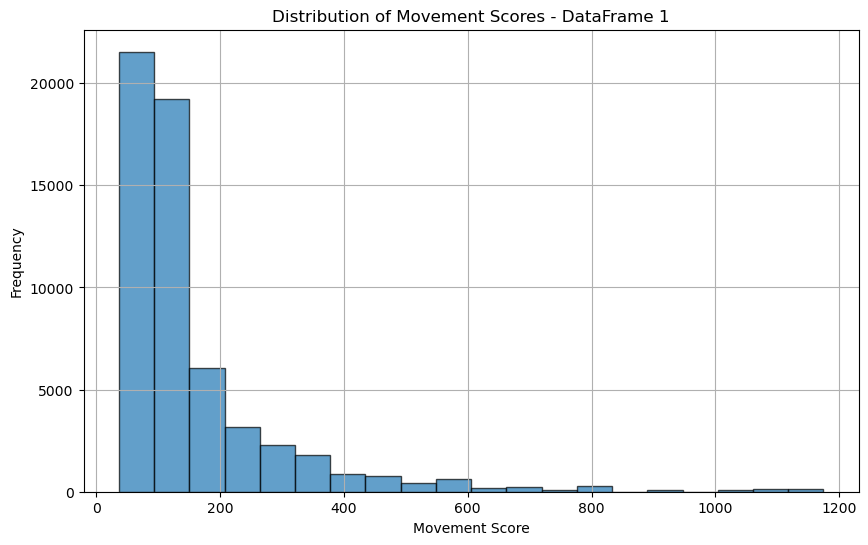

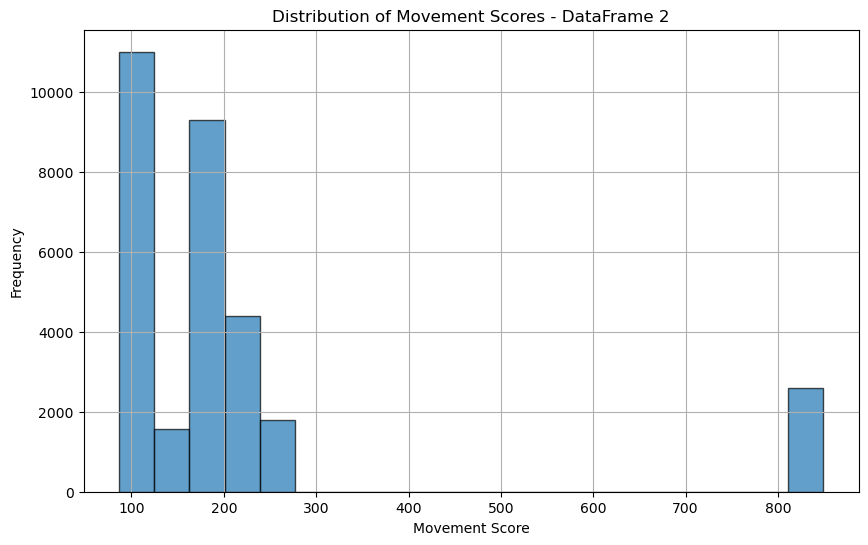

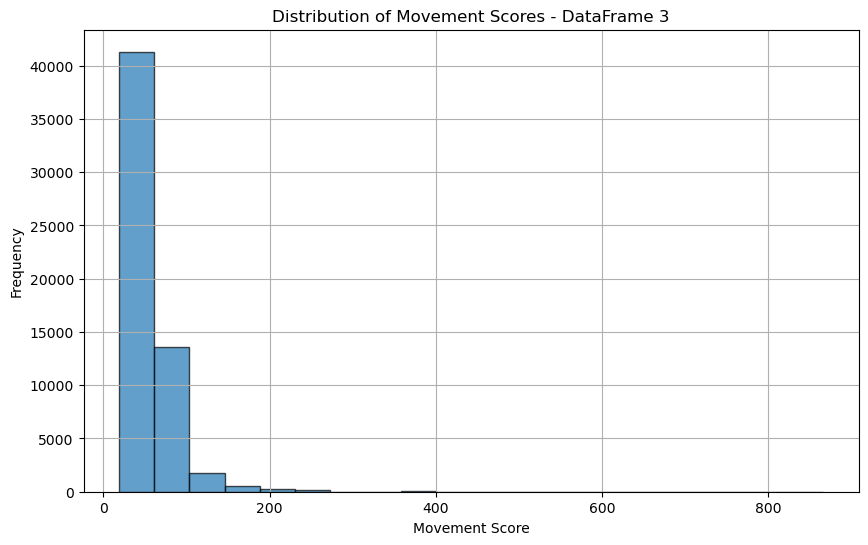

In [37]:
import matplotlib.pyplot as plt

# נניח ש- dfs הוא רשימת ה-DataFrames שלך
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 6))
    plt.hist(df['overall_movement_score'], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of Movement Scores - DataFrame {i+1}")
    plt.xlabel("Movement Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


In [38]:
import pandas as pd

def normalize_to_0_10_using_z(df, column_name):
    # חישוב ממוצע וסטיית תקן
    mean = df[column_name].mean()  # ממוצע הציונים
    std_dev = df[column_name].std()  # סטיית תקן
    
    # חישוב ה-Z-Score עבור כל הציונים
    z_scores = (df[column_name] - mean) / std_dev
    
    # חיתוך ערכים קיצוניים אם יש (למנוע השפעה לא נכונה של חריגים)
    z_scores_clipped = z_scores.clip(-2, 2)  # חיתוך ל-Z Score בטווח -2 עד 2
    
    # ממפים את ה-Z-Score לטווח 0-10 כך שהממוצע יהיה 5
    normalized_scores = (z_scores_clipped + 2) * 2.5  # מביא את הציונים לטווח 0-10
    return normalized_scores

# נניח ש- dfs הוא רשימת ה-DataFrames שלך
for df in dfs:
    df['overall_movement_score'] = normalize_to_0_10_using_z(df, 'overall_movement_score')

# שמירה של התוצאות
output_file_paths = ['df_yolo_filtered.csv', 'df_movenet_filtered.csv', 'df_mediapipe_filtered.csv']
for df, output_path in zip(dfs, output_file_paths):
    df.to_csv(output_path, index=False)


In [39]:
'''
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# איסוף כל הערכים מכל הדאטהפריימים
all_scores = []
for df in dfs_standardized:
    if 'overall_movement_score' in df.columns:
        all_scores.extend(df['overall_movement_score'].values)

all_scores = np.array(all_scores).reshape(-1, 1)

# יצירת הסקיילר ונרמול
scaler_0_10 = MinMaxScaler(feature_range=(0, 100))
scaler_0_10.fit(all_scores)


dfs_filtered = []
required_columns = ["video_id", "window_id"]  # שים לב שזה עכשיו רשימה, לא set

for df in dfs_standardized:
    if 'overall_movement_score' in df.columns:
        df['overall_movement_score'] = scaler_0_10.transform(df[['overall_movement_score']])
    remaining_columns = [col for col in df.columns if col not in required_columns]
    ordered_columns = required_columns + remaining_columns
    ordered_columns = [col for col in ordered_columns if col in df.columns]
    df_filtered = df[ordered_columns]
    dfs_filtered.append(df_filtered)

output_file_paths = ['df_yolo_filtered.csv', 'df_movenet_filtered.csv', 'df_mediapipe_filtered.csv']
for df_filtered, output_path in zip(dfs_filtered, output_file_paths):
    print(f"Saving to {output_path}, columns: {df_filtered.columns.tolist()}")
    df_filtered.to_csv(output_path, index=False)

'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import MinMaxScaler\nimport numpy as np\n\n# איסוף כל הערכים מכל הדאטהפריימים\nall_scores = []\nfor df in dfs_standardized:\n    if \'overall_movement_score\' in df.columns:\n        all_scores.extend(df[\'overall_movement_score\'].values)\n\nall_scores = np.array(all_scores).reshape(-1, 1)\n\n# יצירת הסקיילר ונרמול\nscaler_0_10 = MinMaxScaler(feature_range=(0, 100))\nscaler_0_10.fit(all_scores)\n\n\ndfs_filtered = []\nrequired_columns = ["video_id", "window_id"]  # שים לב שזה עכשיו רשימה, לא set\n\nfor df in dfs_standardized:\n    if \'overall_movement_score\' in df.columns:\n        df[\'overall_movement_score\'] = scaler_0_10.transform(df[[\'overall_movement_score\']])\n    remaining_columns = [col for col in df.columns if col not in required_columns]\n    ordered_columns = required_columns + remaining_columns\n    ordered_columns = [col for col in ordered_columns if col in df.columns]\n    df_filtered = d

In [40]:

file_paths = ['df_yolo_filtered.csv',
              'df_movenet_filtered.csv',
              'df_mediapipe_filtered.csv']


dfs = [pd.read_csv(path) for path in file_paths]

common_columns = set(dfs[0].columns)  

for df in dfs[1:]:
    common_columns &= set(df.columns)  

print("common columns of all files:")
print(common_columns)

common columns of all files:
{'right_elbow_velocity_x', 'right_shoulder_x', 'right_elbow_y', 'left_elbow_x', 'left_shoulder_x', 'left_elbow_velocity_x', 'right_hip_y', 'left_elbow_score', 'left_knee_y', 'overall_movement_score', 'right_knee_velocity_x', 'dominant_elbow', 'right_elbow_velocity_y', 'left_hip_y', 'right_knee_y', 'right_shoulder_y', 'right_knee_velocity_y', 'left_elbow_y', 'video_id', 'left_shoulder_y', 'left_elbow_velocity_y', 'left_knee_velocity_x', 'angle_right_elbow', 'left_hip_velocity_x', 'right_elbow_x', 'right_shoulder_velocity_x', 'right_hip_velocity_y', 'left_shoulder_velocity_y', 'left_hip_x', 'right_hip_velocity_x', 'angle_left_elbow', 'window_id', 'left_shoulder_velocity_x', 'right_elbow_score', 'left_knee_velocity_y', 'right_hip_x', 'angle_left_knee', 'right_knee_x', 'right_shoulder_velocity_y', 'left_knee_score', 'dominant_knee', 'angle_right_knee', 'left_knee_x', 'right_knee_score', 'left_hip_velocity_y', 'frame'}


In [41]:
'''
def safe_get_abs(df, col):
    return df[col].abs() if col in df.columns else pd.Series(0, index=df.index)

def compute_movement_score(df):
    joints = ['elbow', 'knee', 'shoulder', 'hip']
    sides = ['left', 'right']
    joint_scores = []

    for joint in joints:
        for side in sides:
            angle_col = f'angle_{side}_{joint}'
            vx_col = f'{side}_{joint}_velocity_x'
            vy_col = f'{side}_{joint}_velocity_y'
            conf_col = f'{side}_{joint}_confidence'

            angle = safe_get_abs(df, angle_col)
            vx = safe_get_abs(df, vx_col)
            vy = safe_get_abs(df, vy_col)
            conf = df[conf_col] if conf_col in df.columns else pd.Series(0, index=df.index)

            score = conf * (angle + vx + vy)
            joint_scores.append(score)

    df['overall_movement_score_raw'] = sum(joint_scores)

    # נרמול לטווח 0–10
    scaler = MinMaxScaler(feature_range=(0, 10))
    df['overall_movement_score'] = scaler.fit_transform(df[['overall_movement_score_raw']])

    return df

# החלה על כל הטבלאות
dfs = [compute_movement_score(df) for df in dfs]
'''

"\ndef safe_get_abs(df, col):\n    return df[col].abs() if col in df.columns else pd.Series(0, index=df.index)\n\ndef compute_movement_score(df):\n    joints = ['elbow', 'knee', 'shoulder', 'hip']\n    sides = ['left', 'right']\n    joint_scores = []\n\n    for joint in joints:\n        for side in sides:\n            angle_col = f'angle_{side}_{joint}'\n            vx_col = f'{side}_{joint}_velocity_x'\n            vy_col = f'{side}_{joint}_velocity_y'\n            conf_col = f'{side}_{joint}_confidence'\n\n            angle = safe_get_abs(df, angle_col)\n            vx = safe_get_abs(df, vx_col)\n            vy = safe_get_abs(df, vy_col)\n            conf = df[conf_col] if conf_col in df.columns else pd.Series(0, index=df.index)\n\n            score = conf * (angle + vx + vy)\n            joint_scores.append(score)\n\n    df['overall_movement_score_raw'] = sum(joint_scores)\n\n    # נרמול לטווח 0–10\n    scaler = MinMaxScaler(feature_range=(0, 10))\n    df['overall_movement_score'] =

In [42]:

for df, path in zip(dfs, output_file_paths):
    df.to_csv(path, index=False)



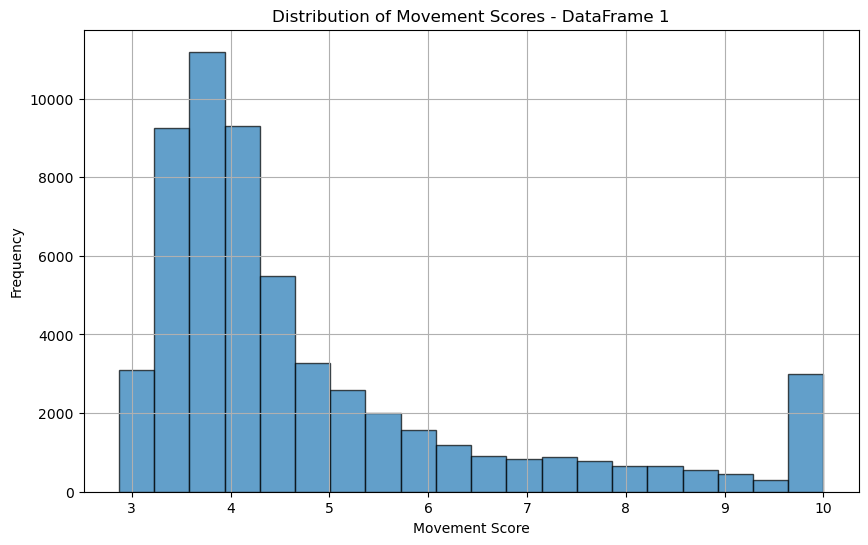

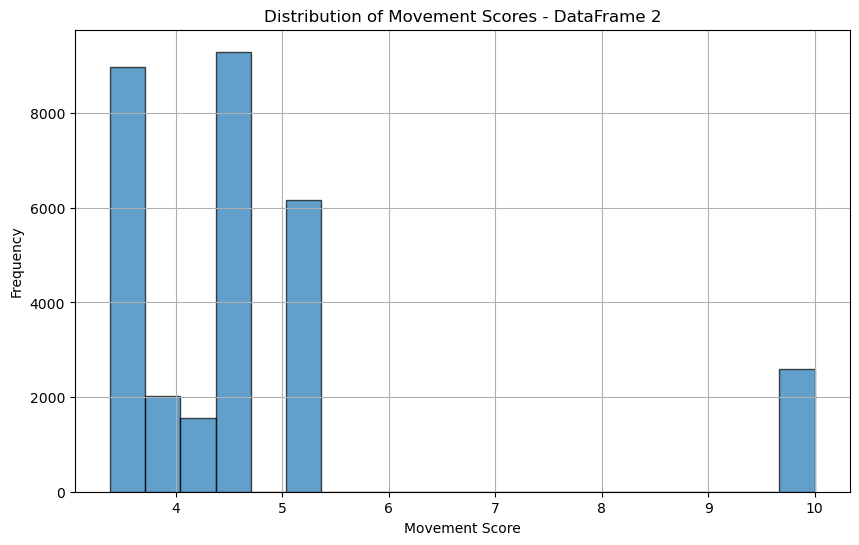

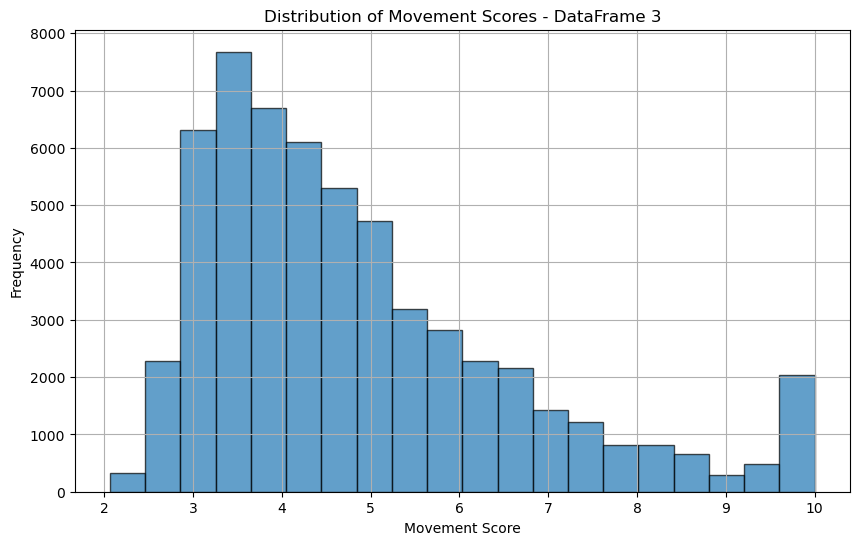

In [43]:
import matplotlib.pyplot as plt

# נניח ש- dfs הוא רשימת ה-DataFrames שלך
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 6))
    plt.hist(df['overall_movement_score'], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of Movement Scores - DataFrame {i+1}")
    plt.xlabel("Movement Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


In [44]:
'''
import numpy as np 
from scipy.stats import norm

def quantile_to_normal(df, column):
    # חישוב דרגת אחוזון (מספר בין 0 ל-1)
    quantiles = df[column].rank(pct=True)
    
    # העברת אחוזון להתפלגות נורמלית עם ממוצע 5 וסטיית תקן 1
    scores = norm.ppf(quantiles)  # Z-scores מהתפלגות נורמלית
    scores = np.clip(scores, -2, 2)  # חיתוך חריגים
    normalized = (scores + 2) * 2.5  # מיפוי לטווח 0–10 סביב 5
    
    return normalized

# שימוש
for df in dfs:
    df['overall_movement_score'] = quantile_to_normal(df, 'overall_movement_score')

'''

"\nimport numpy as np \nfrom scipy.stats import norm\n\ndef quantile_to_normal(df, column):\n    # חישוב דרגת אחוזון (מספר בין 0 ל-1)\n    quantiles = df[column].rank(pct=True)\n    \n    # העברת אחוזון להתפלגות נורמלית עם ממוצע 5 וסטיית תקן 1\n    scores = norm.ppf(quantiles)  # Z-scores מהתפלגות נורמלית\n    scores = np.clip(scores, -2, 2)  # חיתוך חריגים\n    normalized = (scores + 2) * 2.5  # מיפוי לטווח 0–10 סביב 5\n    \n    return normalized\n\n# שימוש\nfor df in dfs:\n    df['overall_movement_score'] = quantile_to_normal(df, 'overall_movement_score')\n\n"

In [45]:
'''
file_paths = ['df_yolo_filtered.csv',
              'df_movenet_filtered.csv',
              'df_mediapipe_filtered.csv']


dfs = [pd.read_csv(path) for path in file_paths]

common_columns = set(dfs[0].columns)  

for df in dfs[1:]:
    common_columns &= set(df.columns)  

print("common columns of all files:")
print(common_columns)
'''

'\nfile_paths = [\'df_yolo_filtered.csv\',\n              \'df_movenet_filtered.csv\',\n              \'df_mediapipe_filtered.csv\']\n\n\ndfs = [pd.read_csv(path) for path in file_paths]\n\ncommon_columns = set(dfs[0].columns)  \n\nfor df in dfs[1:]:\n    common_columns &= set(df.columns)  \n\nprint("common columns of all files:")\nprint(common_columns)\n'

In [46]:
'''
import matplotlib.pyplot as plt

# נניח ש- dfs הוא רשימת ה-DataFrames שלך
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 6))
    plt.hist(df['overall_movement_score'], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of Movement Scores - DataFrame {i+1}")
    plt.xlabel("Movement Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
'''

'\nimport matplotlib.pyplot as plt\n\n# נניח ש- dfs הוא רשימת ה-DataFrames שלך\nfor i, df in enumerate(dfs):\n    plt.figure(figsize=(10, 6))\n    plt.hist(df[\'overall_movement_score\'], bins=20, edgecolor=\'black\', alpha=0.7)\n    plt.title(f"Distribution of Movement Scores - DataFrame {i+1}")\n    plt.xlabel("Movement Score")\n    plt.ylabel("Frequency")\n    plt.grid(True)\n    plt.show()\n'

In [47]:
'''
import pandas as pd
import numpy as np

def gaussian_shaped_normalization(df, column):
    mean = df[column].mean()
    std = df[column].std()
    
    # Z-score
    z = (df[column] - mean) / std

    # יישום של Gaussian (פעמון) סביב z=0
    # נשתמש בגאוס רגיל ונמפה את התוצאה ל־0–10
    gaussian_score = np.exp(-0.5 * z ** 2)

    # נרמול לטווח 0–10
    normalized = 10 * (gaussian_score - gaussian_score.min()) / (gaussian_score.max() - gaussian_score.min())
    
    return normalized

# שימוש
for df in dfs:
    df['overall_movement_score'] = gaussian_shaped_normalization(df, 'overall_movement_score')

for df, path in zip(dfs, output_file_paths):
    df.to_csv(path, index=False)

'''

"\nimport pandas as pd\nimport numpy as np\n\ndef gaussian_shaped_normalization(df, column):\n    mean = df[column].mean()\n    std = df[column].std()\n    \n    # Z-score\n    z = (df[column] - mean) / std\n\n    # יישום של Gaussian (פעמון) סביב z=0\n    # נשתמש בגאוס רגיל ונמפה את התוצאה ל־0–10\n    gaussian_score = np.exp(-0.5 * z ** 2)\n\n    # נרמול לטווח 0–10\n    normalized = 10 * (gaussian_score - gaussian_score.min()) / (gaussian_score.max() - gaussian_score.min())\n    \n    return normalized\n\n# שימוש\nfor df in dfs:\n    df['overall_movement_score'] = gaussian_shaped_normalization(df, 'overall_movement_score')\n\nfor df, path in zip(dfs, output_file_paths):\n    df.to_csv(path, index=False)\n\n"

In [48]:
'''
file_paths = ['df_yolo_filtered.csv',
              'df_movenet_filtered.csv',
              'df_mediapipe_filtered.csv']


dfs = [pd.read_csv(path) for path in file_paths]

common_columns = set(dfs[0].columns)  

for df in dfs[1:]:
    common_columns &= set(df.columns)  

print("common columns of all files:")
print(common_columns)
'''

'\nfile_paths = [\'df_yolo_filtered.csv\',\n              \'df_movenet_filtered.csv\',\n              \'df_mediapipe_filtered.csv\']\n\n\ndfs = [pd.read_csv(path) for path in file_paths]\n\ncommon_columns = set(dfs[0].columns)  \n\nfor df in dfs[1:]:\n    common_columns &= set(df.columns)  \n\nprint("common columns of all files:")\nprint(common_columns)\n'

In [49]:
'''
for i, df in enumerate(dfs):
    plt.figure(figsize=(10, 6))
    plt.hist(df['overall_movement_score'], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of Movement Scores - DataFrame {i+1}")
    plt.xlabel("Movement Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
'''

'\nfor i, df in enumerate(dfs):\n    plt.figure(figsize=(10, 6))\n    plt.hist(df[\'overall_movement_score\'], bins=20, edgecolor=\'black\', alpha=0.7)\n    plt.title(f"Distribution of Movement Scores - DataFrame {i+1}")\n    plt.xlabel("Movement Score")\n    plt.ylabel("Frequency")\n    plt.grid(True)\n    plt.show()\n'